In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter


%matplotlib inline

#increase plot size
plt.rcParams['figure.figsize'] = [20, 10]

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

yellow = (237, 215, 79)
yellow = tuple([val / 255 for val in yellow])  # Normalize to range [0, 1]

red = (177,39,28)
red = tuple([val / 255 for val in red])  # Normalize to range [0, 1]

In [2]:
SAVEFIG = True

In [3]:
model = Schelling(width = 50, height = 50, density = 0.80, minority_pc = 0.4, homophily = 3,  policy = 'random', follow_policy=1, seed = 1995)


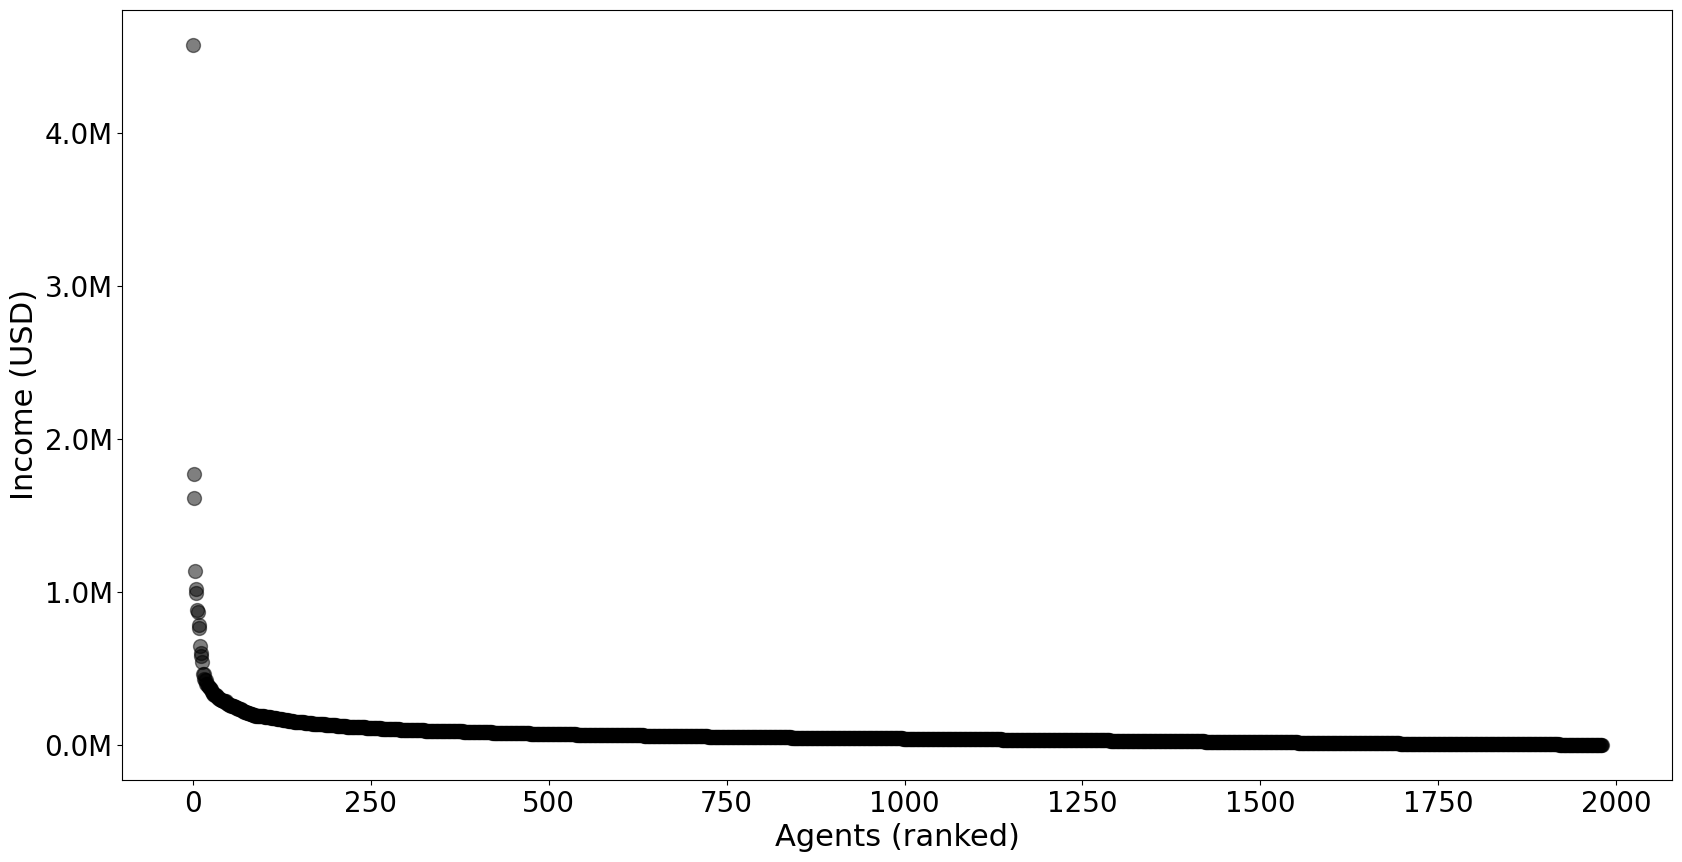

In [4]:

#plot an histogram of the incomes of the agents

incomes = [agent.income for agent in model.schedule.agents]


incomes = sorted(incomes, reverse=True)

def millions_formatter(x, pos):
    return f'{x / 1000000}M'

fig, ax = plt.subplots()
#plot a with points with
plt.plot(incomes, 'o', markersize=10, alpha=0.5, color='black')

plt.xlabel("Agents (ranked)", fontsize=22)
plt.ylabel("Income (USD)", fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#loglog plot
#plt.loglog()

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


#if SAVEFIG:
#    plt.savefig("plots/income.pdf", bbox_inches="tight")



In [5]:
model = Schelling(width = 25, height = 25, density = 0.80, minority_pc = 0.4, homophily = 3,  policy = 'random', follow_policy=1, seed = 1995)


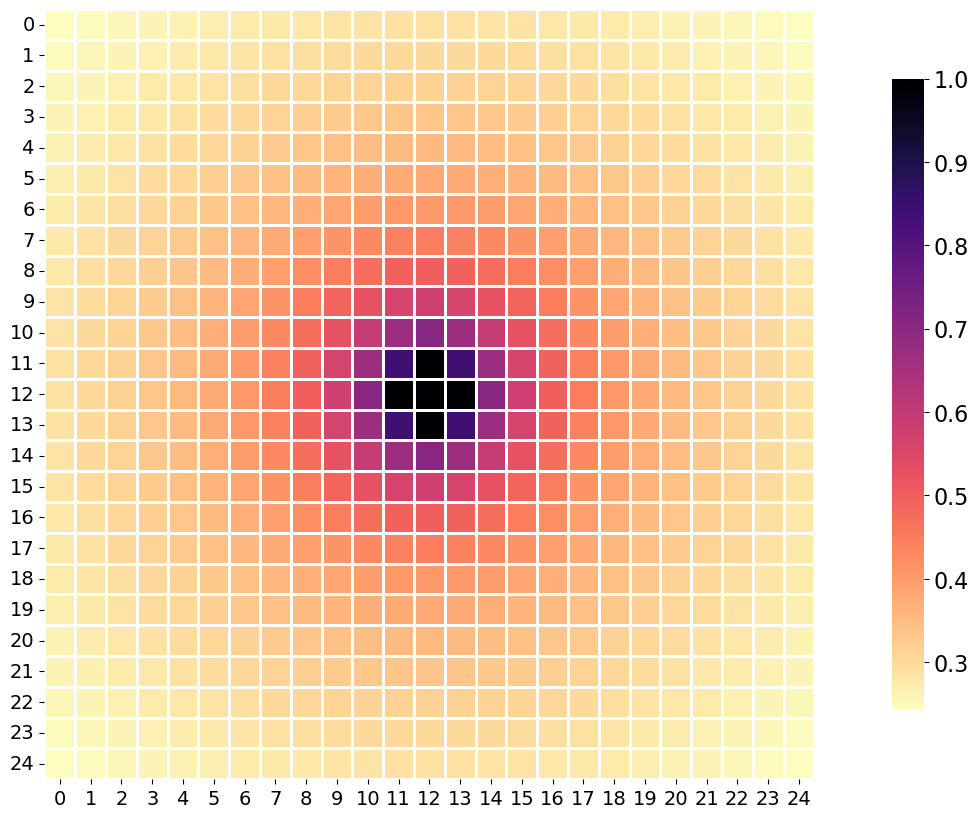

In [6]:
# Import the necessary modules
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap of the relevance matrix
sns.heatmap(model.relevance_matrix, cmap="magma_r", square=True, cbar_kws={"shrink": .82}, linewidths=1, linecolor='white', xticklabels=True, yticklabels=True, cbar=True)

# Rotate the x-axis and y-axis labels
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(rotation='horizontal', fontsize = 14)

#increase cbar tick size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)


if SAVEFIG:
    plt.savefig("plots/relevance_matrix.pdf", bbox_inches="tight")


In [7]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

start_occupancy = model.cell_occupancy_matrix_array[0]  #1 are minority, 0 are majority, -1 are empty
end_occupancy = model.cell_occupancy_matrix_array[model.schedule.steps] 

50


<Axes: title={'center': 'End occupancy'}>

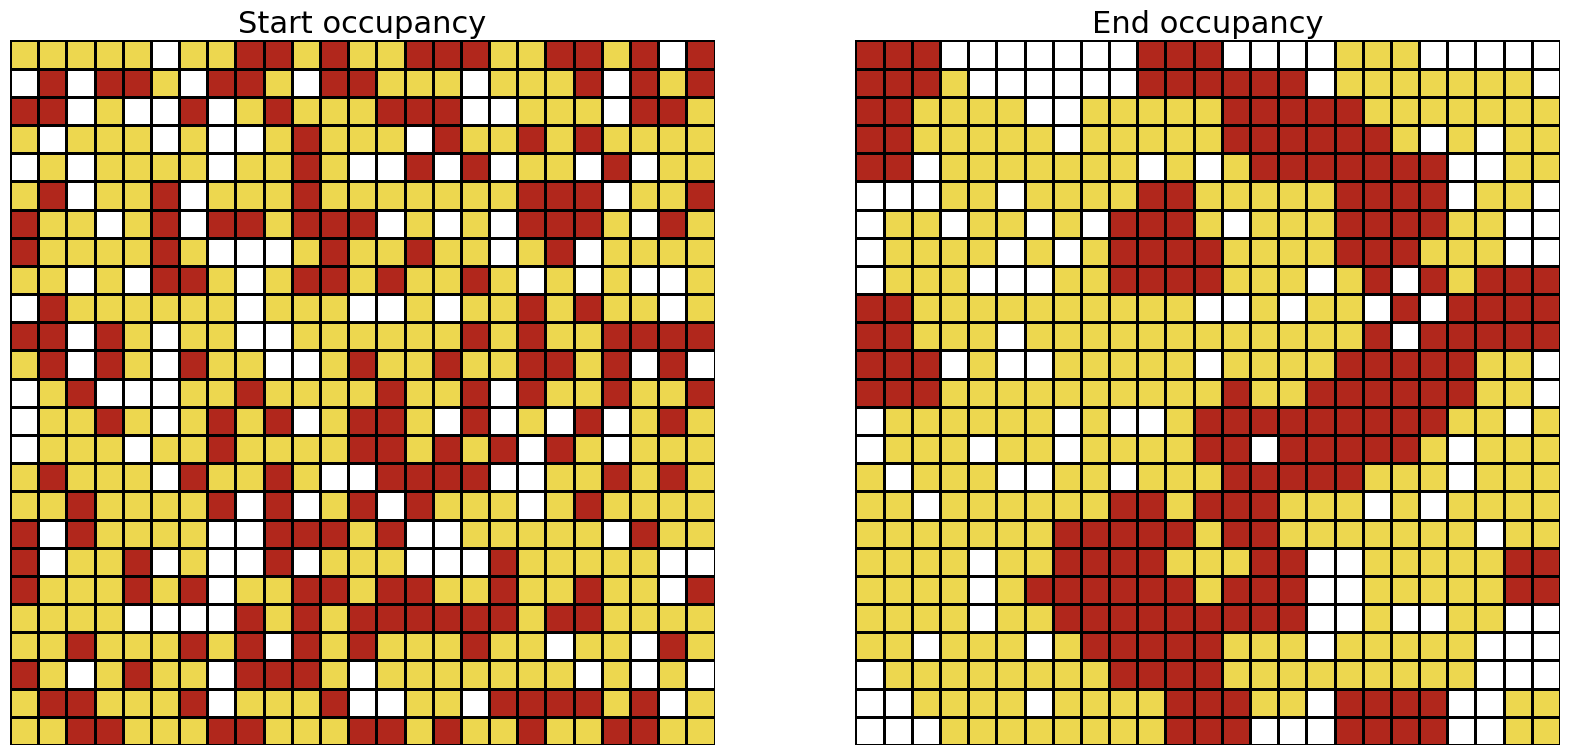

In [8]:
#realize two subplots, one for the start occupancy and one for the end occupancy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title("Start occupancy", fontsize=22)
ax2.set_title("End occupancy", fontsize=22)

#with seaborn realize an heatmap of the occupancy matrix. Divide cells with a white line

yellow = (237, 215, 79)
yellow = tuple([val / 255 for val in yellow])  # Normalize to range [0, 1]

red = (177,39,28)
red = tuple([val / 255 for val in red])  # Normalize to range [0, 1]

colors = ['white', yellow, red]  # Colors for -1, 0, 1 respectively
cmap = ListedColormap(colors)

sns.heatmap(start_occupancy, cmap=cmap, ax=ax1, square=True, cbar=False, linewidths=1, linecolor="black", xticklabels=False, yticklabels=False)
sns.heatmap(end_occupancy,   cmap=cmap, ax=ax2, square=True, cbar=False, linewidths=1, linecolor="black", xticklabels=False, yticklabels=False)

#if SAVEFIG:
#    plt.savefig("plots/occupancy.pdf", bbox_inches='tight')

In [9]:
path = "results.csv"
results_df = pd.read_csv(path)

In [10]:
results_df = results_df[["RunId", "iteration", "Step", "follow_policy", "policy",  "segregation"]]
#calculate the average Step and the average segregation, across different iteration and policy
results_df_g = results_df.groupby(['policy', 'follow_policy']).mean().reset_index()
results_df_g.head(20)

,policy,follow_policy,RunId,iteration,Step,segregation
0,different_neighborhood,0.0,1941.5,24.5,26.76,0.660960
1,different_neighborhood,0.1,1942.5,24.5,170.34,0.661460
2,different_neighborhood,0.2,1943.5,24.5,229.00,0.658511
3,different_neighborhood,0.3,1944.5,24.5,208.70,0.663551
4,different_neighborhood,0.4,1945.5,24.5,248.16,0.666341
5,different_neighborhood,0.5,1946.5,24.5,225.72,0.667069
6,different_neighborhood,0.6,1947.5,24.5,212.08,0.672049
7,different_neighborhood,0.7,1948.5,24.5,231.54,0.677122
8,different_neighborhood,0.8,1949.5,24.5,228.76,0.679087
9,different_neighborhood,0.9,1950.5,24.5,180.68,0.685480


In [11]:
policy_dict = {}
num_categories = 20
# Generating colors using the 'tab20' colormap from Matplotlib
colors = [plt.cm.tab20b(i) for i in np.linspace(0, 1, num_categories)]

colors[1]

(0.3215686274509804, 0.32941176470588235, 0.6392156862745098, 1.0)

In [12]:
policy_dict["similar_neighborhood"] = colors[0]
policy_dict["different_neighborhood"] = colors[1]
policy_dict["minimum_improvement"]  = colors[4]
policy_dict["maximum_improvement"] = colors[5]
policy_dict["recently_emptied"] = colors[8]
policy_dict["distance_relevance"] = colors[12]


In [13]:
if path == "results_similarity.csv":
    policy_order = [ "minimum_improvement", "recently_emptied", "distance_relevance", "random", "similar_neighborhood", "different_neighborhood", "maximum_improvement"]
else:
    policy_order = ["minimum_improvement", "maximum_improvement", "recently_emptied", "distance_relevance", "random", "similar_neighborhood", "different_neighborhood"]

In [14]:
results_df_g["follow_policy"] = (results_df_g["follow_policy"]*100).astype(int)
results_df_g

,policy,follow_policy,RunId,iteration,Step,segregation
0,different_neighborhood,0,1941.5,24.5,26.76,0.660960
1,different_neighborhood,10,1942.5,24.5,170.34,0.661460
2,different_neighborhood,20,1943.5,24.5,229.00,0.658511
3,different_neighborhood,30,1944.5,24.5,208.70,0.663551
4,different_neighborhood,40,1945.5,24.5,248.16,0.666341
...,...,...,...,...,...,...
72,similar_neighborhood,60,1936.5,24.5,300.00,0.637585
73,similar_neighborhood,70,1937.5,24.5,300.00,0.633144
74,similar_neighborhood,80,1938.5,24.5,300.00,0.632909
75,similar_neighborhood,90,1939.5,24.5,300.00,0.631135


In [15]:
results_df_g["Step"].max()

300.0

maximum_improvement
300.0


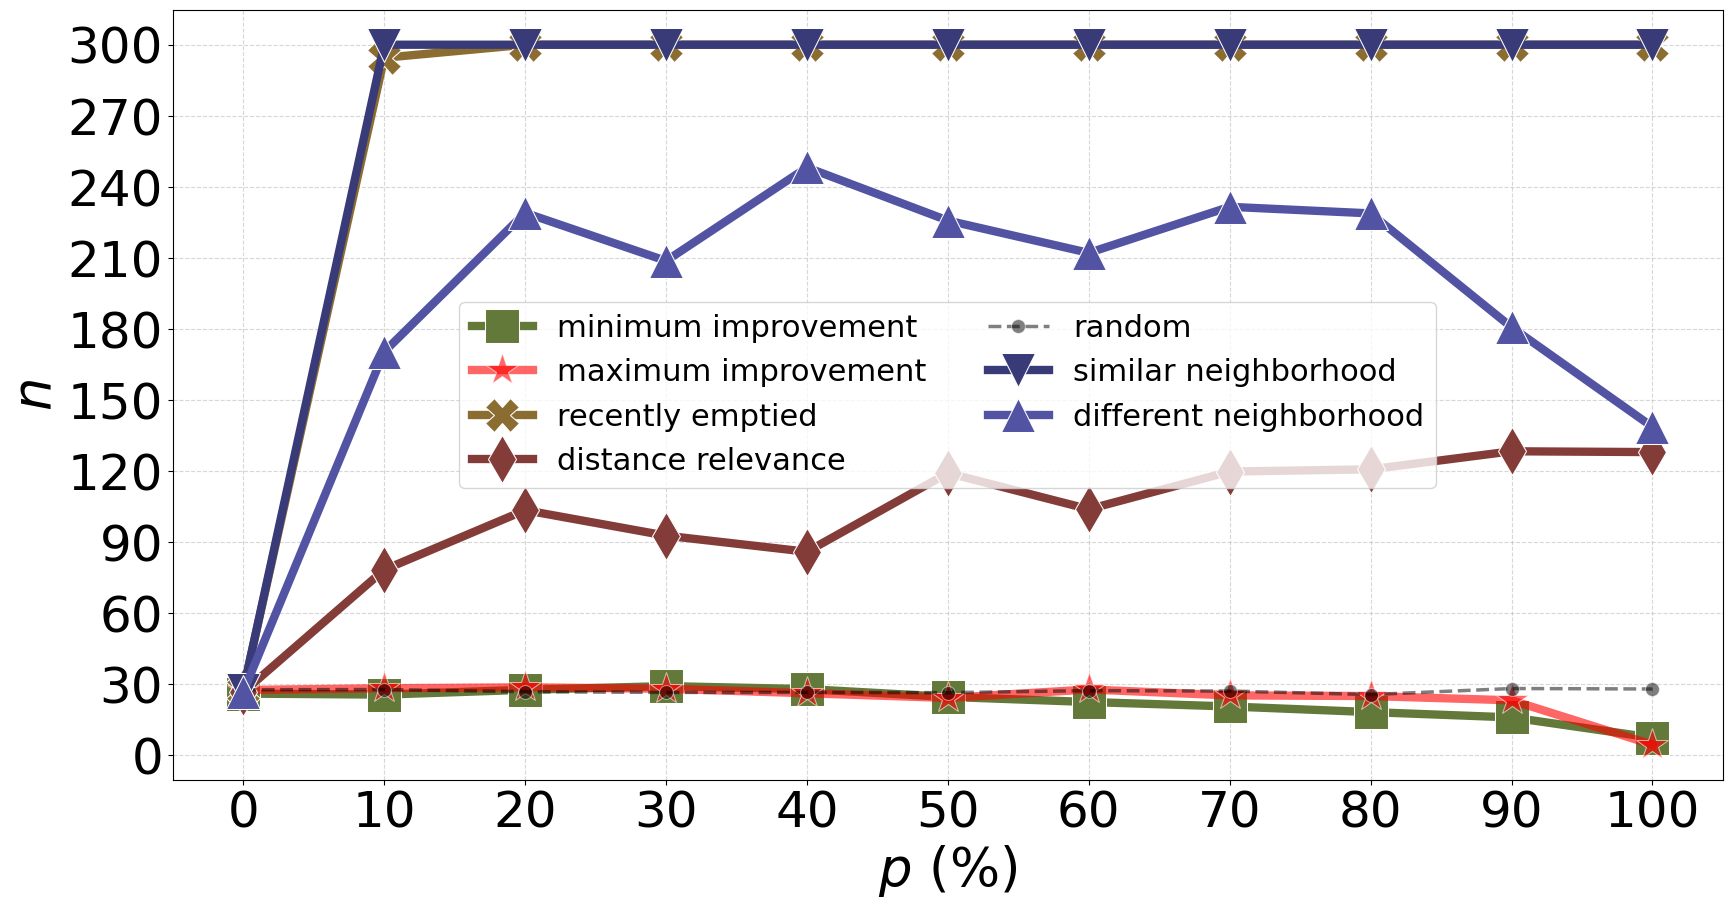

In [16]:
# do the same with a for loo

linewidth = 6
markersize = 24

for policy in policy_order:
    if policy == 'random':
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=2.5,
                           marker="o", markersize = 10,  color="black", alpha=0.5, linestyle = "--")
        
        
    elif policy == "minimum_improvement":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="s", markersize = markersize,  color=policy_dict[policy])
        
    elif policy == "maximum_improvement":
        print("maximum_improvement")
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="*", markersize = markersize,  color="red", alpha = 0.6)
        
    elif policy == "similar_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="v", markersize = markersize,color=policy_dict[policy])
        
    elif policy == "different_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=linewidth, 
                           marker="^", markersize = markersize, color=policy_dict[policy])

    elif policy == "recently_emptied":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="X", markersize = markersize, color=policy_dict[policy])
        
    elif policy == "distance_relevance":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="d", markersize = markersize, color=policy_dict[policy])

ax.set_xlabel(r"$p$ (%)", fontsize=38)
ax.set_ylabel(r"$n$", fontsize=38)   
ax.tick_params(labelsize=36)
#put percentage mark  in the x axis
ax.set_xticks(np.arange(0, 100.1, 10))
mass = results_df_g["Step"].max()
print(mass)
ax.set_yticks(np.arange(0, mass+0.1, mass/10))
ax.legend(fontsize=22, ncol = 2)

#put the grid
ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

if SAVEFIG:
    if path == "results_similarity.csv":
        plt.savefig("plots/average_steps_similarity.pdf", bbox_inches='tight')
    elif path == "results_1.csv":
        plt.savefig("plots/average_steps_1.pdf", bbox_inches='tight')
    else:
        plt.savefig("plots/average_steps.pdf", bbox_inches='tight')


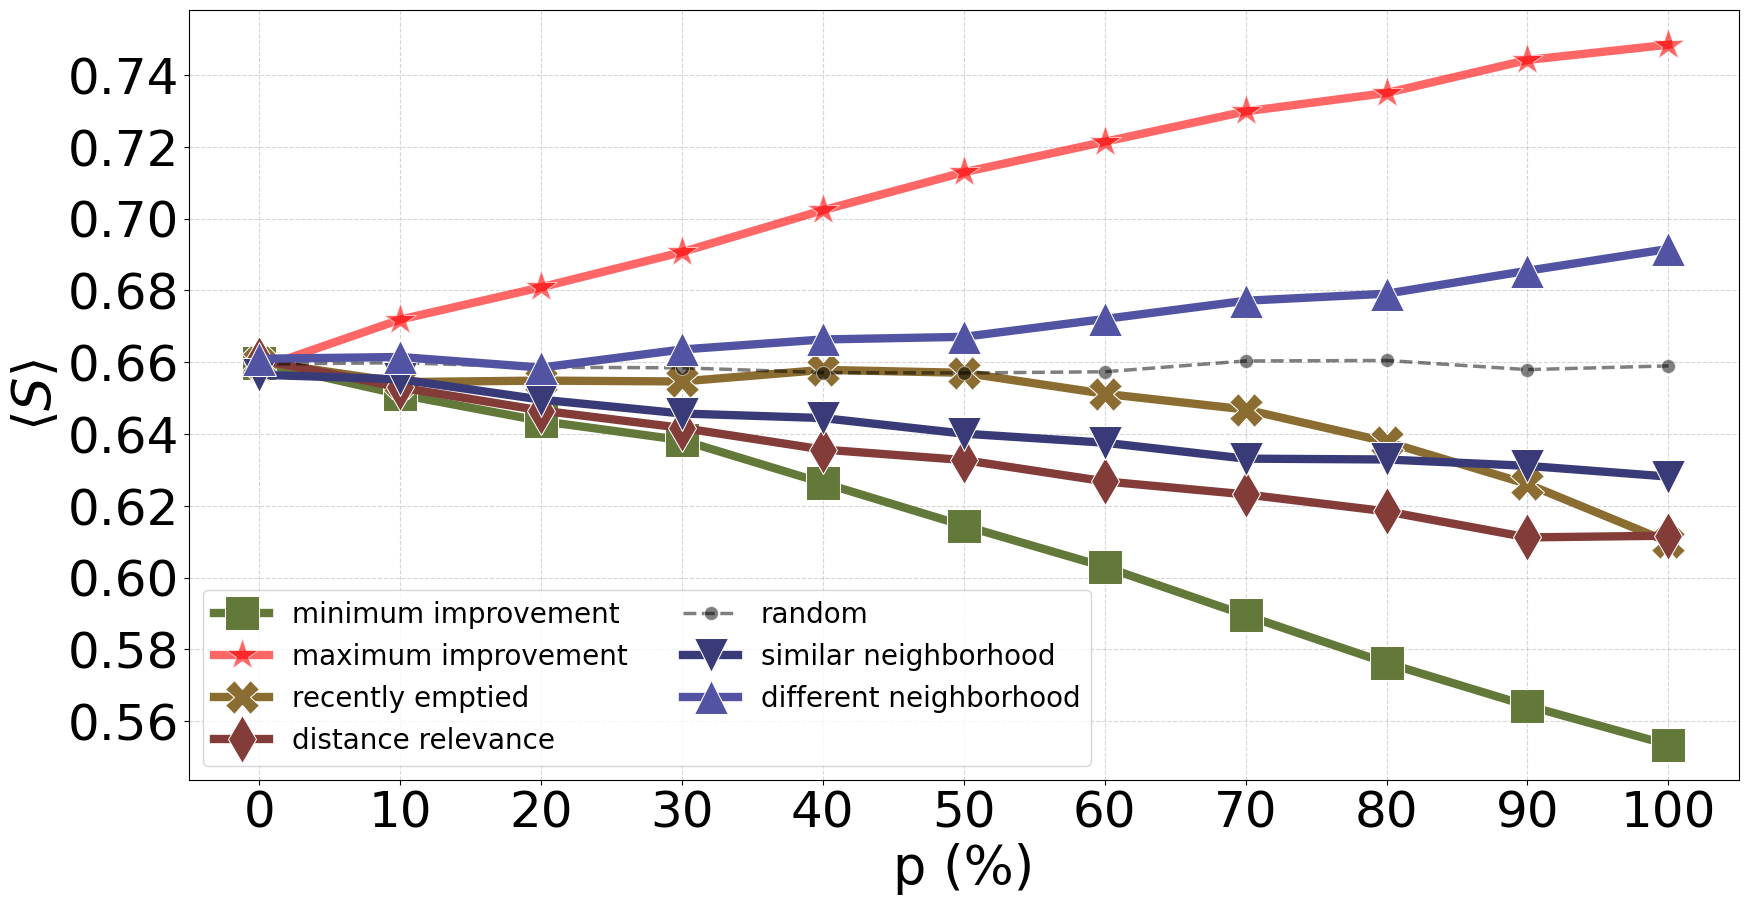

In [17]:
#plot the timeseries of segregation, using seaborn, with grid every 0.1 on x axis and with line and points. The random policy must be thicker than the others as above


for policy in policy_order:
    if policy == 'random':
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=2.5,
                           marker="o", markersize = 10,  color="black", alpha=0.5, linestyle = "--")
    
    elif policy == "minimum_improvement":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="s", markersize = markersize, color=policy_dict[policy])
                
    elif policy == "maximum_improvement":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="*", markersize = markersize, dashes=False, color="red", alpha = 0.6)
        

    elif policy == "similar_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="v", markersize = markersize, dashes=False, color=policy_dict[policy])
      
    elif policy == "different_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=linewidth, 
                           marker="^", markersize = markersize,  color=policy_dict[policy])
              
    elif policy == "recently_emptied":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="X", markersize = markersize, dashes=False, color=policy_dict[policy])


    elif policy == "distance_relevance":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label = policy.replace("_", " "), linewidth=linewidth, 
                          marker="d", markersize = markersize, dashes=False, color=policy_dict[policy])
        
ax.set_xlabel("p (%)", fontsize=38)
ax.set_ylabel(r"$\langle S \rangle$", fontsize=38)   
ax.tick_params(labelsize=36)
ax.set_xticks(np.arange(0, 100.1, 10))
ax.set_yticks(np.arange(0.56, 0.741, 0.02))
ax.legend(fontsize=20, ncol = 2)

ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)


if SAVEFIG:
    if path == "results_similarity.csv":
        plt.savefig("plots/average_segregation_similarity.pdf", bbox_inches='tight')
    elif path == "results_1.csv":
        plt.savefig("plots/average_segregation_1.pdf", bbox_inches='tight')
    else:
        plt.savefig("plots/average_segregation.pdf", bbox_inches='tight')